In [1]:
import pandas as pd

file_path = 'Dataset - complex_account_billing_data.csv' 
data = pd.read_csv(file_path)

data.head()



,Account ID,Customer Name,Billing Date,Amount,Status,Description,Department
0,1001,David Wilson,2023-01-01,193.987558,Pending,Consultation,Pediatrics
1,1002,Alice Johnson,2023-01-02,370.656021,Pending,Purchase,Orthopedics
2,1003,Sophia Garcia,2023-01-03,233.019486,Pending,Lab Test,Pharmacy
3,1004,Olivia Davis,2023-01-04,296.120725,Paid,Follow-up,Pharmacy
4,1005,David Wilson,2023-01-05,294.654764,Paid,Therapy,ENT


In [4]:

data['Billing_Date'] = pd.to_datetime(data['Billing Date'])


missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)


duplicate_entries = data.duplicated().sum()
print("Duplicate Entries:\n", duplicate_entries)


inconsistent_data = data[data['Amount'] < 0]
print("Inconsistent Data:\n", inconsistent_data)


Missing Values:
 Account ID       0
Customer Name    0
Billing Date     0
Amount           0
Status           0
Description      0
Department       0
Billing_Date     0
dtype: int64
Duplicate Entries:
 0
Inconsistent Data:
 Empty DataFrame
Columns: [Account ID, Customer Name, Billing Date, Amount, Status, Description, Department, Billing_Date]
Index: []


In [5]:
status_counts = data['Status'].value_counts()
print("Payment Status Counts:\n", status_counts)

total_billed_per_dept = data.groupby('Department')['Amount'].sum()
print("Total Amount Billed per Department:\n", total_billed_per_dept)

average_billing_per_customer = data.groupby('Customer Name')['Amount'].mean()
print("Average Billing Amount per Customer:\n", average_billing_per_customer)


Payment Status Counts:
 Status
Paid       38
Unpaid     34
Pending    33
Unknown     5
Name: count, dtype: int64
Total Amount Billed per Department:
 Department
Cardiology           3435.351394
Dermatology          2957.750657
ENT                 12327.746765
General Practice     4174.839297
Neurology            4101.849231
Oncology             8110.286370
Orthopedics          1643.767134
Pediatrics           5561.996200
Pharmacy             3752.991825
Radiology            1657.427957
Unknown              4999.985162
Name: Amount, dtype: float64
Average Billing Amount per Customer:
 Customer Name
Alice Johnson      270.080057
Chris Lee          471.893112
David Wilson       523.985322
Emma Brown         542.194201
Jane Smith         588.377437
John Doe           649.869762
Liam Martinez      478.099240
Mason Rodriguez    486.992113
Olivia Davis       368.568082
Sophia Garcia      217.974527
Name: Amount, dtype: float64


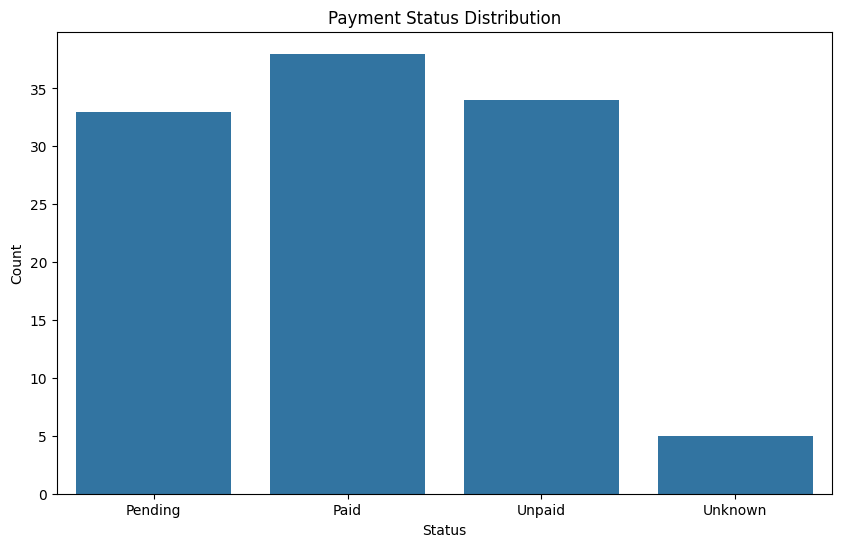

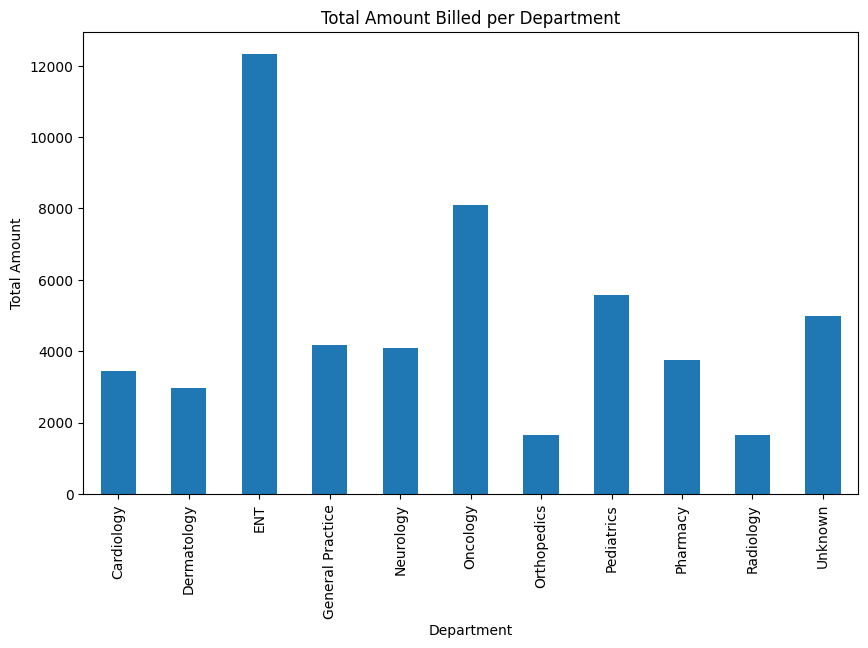

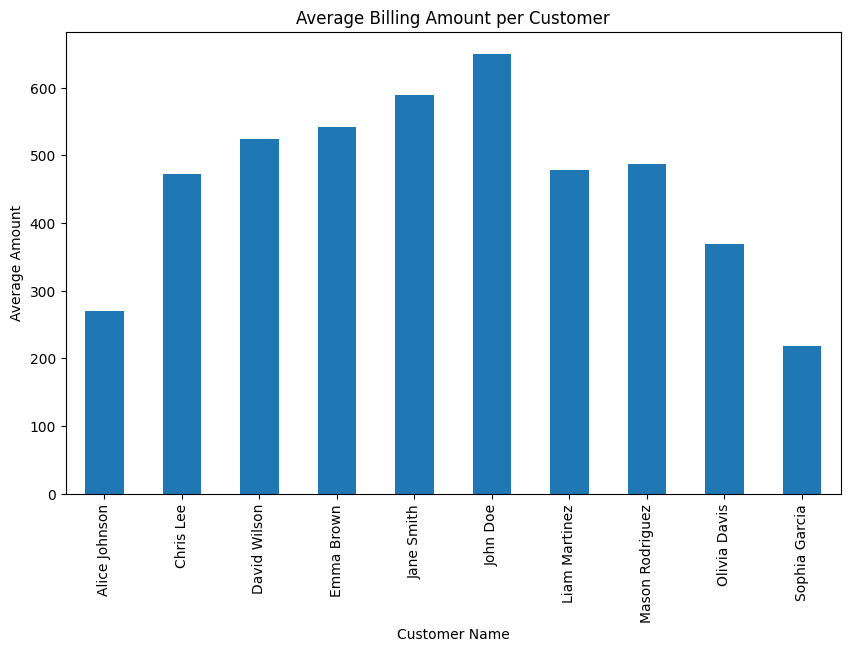


Billing Analysis Report
Payment Status Counts:
Status
Paid       38
Unpaid     34
Pending    33
Unknown     5

Total Amount Billed per Department:
Department
Cardiology           3435.351394
Dermatology          2957.750657
ENT                 12327.746765
General Practice     4174.839297
Neurology            4101.849231
Oncology             8110.286370
Orthopedics          1643.767134
Pediatrics           5561.996200
Pharmacy             3752.991825
Radiology            1657.427957
Unknown              4999.985162

Average Billing Amount per Customer:
Customer Name
Alice Johnson      270.080057
Chris Lee          471.893112
David Wilson       523.985322
Emma Brown         542.194201
Jane Smith         588.377437
John Doe           649.869762
Liam Martinez      478.099240
Mason Rodriguez    486.992113
Olivia Davis       368.568082
Sophia Garcia      217.974527



In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.countplot(x='Status', data=data)
plt.title('Payment Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
total_billed_per_dept.plot(kind='bar')
plt.title('Total Amount Billed per Department')
plt.xlabel('Department')
plt.ylabel('Total Amount')
plt.show()

plt.figure(figsize=(10, 6))
average_billing_per_customer.plot(kind='bar')
plt.title('Average Billing Amount per Customer')
plt.xlabel('Customer Name')
plt.ylabel('Average Amount')
plt.show()


report_summary = f"""
Billing Analysis Report
=====================
Payment Status Counts:
{status_counts.to_string()}

Total Amount Billed per Department:
{total_billed_per_dept.to_string()}

Average Billing Amount per Customer:
{average_billing_per_customer.to_string()}
"""


with open('billing_analysis_report.txt', 'w') as file:
    file.write(report_summary)

print(report_summary)


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json


ai21_api_key = 'UpOkmmQYhyW9N9GTh5akVHqIbsCuqPmz'  

def load_data(file_path):
    return pd.read_csv(file_path)

def validate_data(data):
    data['billing_date'] = pd.to_datetime(data['Billing Date'])
    status_counts = data['Status'].value_counts()
    total_billed_per_dept = data.groupby('Department')['Amount'].sum()
    average_billing_per_customer = data.groupby('Customer Name')['Amount'].mean()
    return status_counts, total_billed_per_dept, average_billing_per_customer

def plot_visualizations(data, total_billed_per_dept, average_billing_per_customer):
    # Payment status distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Status', data=data)
    plt.title('Payment Status Distribution')
    plt.xlabel('Status')
    plt.ylabel('Count')
    plt.savefig('payment_status_distribution.png')
    plt.close()

    
    plt.figure(figsize=(10, 6))
    total_billed_per_dept.plot(kind='bar')
    plt.title('Total Amount Billed per Department')
    plt.xlabel('Department')
    plt.ylabel('Total Amount')
    plt.savefig('total_billed_per_department.png')
    plt.close()

    # Average billing amount per customer
    plt.figure(figsize=(10, 6))
    average_billing_per_customer.plot(kind='bar')
    plt.title('Average Billing Amount per Customer')
    plt.xlabel('Customer Name')
    plt.ylabel('Average Amount')
    plt.savefig('average_billing_per_customer.png')
    plt.close()

def generate_insights(status_counts, total_billed_per_dept, average_billing_per_customer):
    input_text = f"""
    Billing Analysis Report
    =======================
    Payment Status Counts:
    {status_counts.to_string()}

    Total Amount Billed per Department:
    {total_billed_per_dept.to_string()}

    Average Billing Amount per Customer:
    {average_billing_per_customer.to_string()}

    Please provide insights and a summary of the overall accuracy and efficiency of the billing process.
    """

    headers = {
        'Authorization': f'Bearer {ai21_api_key}',
        'Content-Type': 'application/json'
    }

    data = {
        'prompt': input_text,
        'maxTokens': 500,
        'temperature': 0.7,
        'topP': 1,
        'stopSequences': ["###"]
    }

    response = requests.post('https://api.ai21.com/studio/v1/j2-large/complete', headers=headers, json=data)

    response_json = response.json()
    
    
    print("Full response from AI21 Labs API:", response_json)

    if 'completions' in response_json:
        return response_json['completions'][0]['data']['text'].strip()
    else:
        error_message = response_json.get('error', 'Unknown error occurred')
        raise Exception(f"API request failed with error: {error_message}")

def generate_report(file_path):
    data = load_data(file_path)
    status_counts, total_billed_per_dept, average_billing_per_customer = validate_data(data)
    plot_visualizations(data, total_billed_per_dept, average_billing_per_customer)

    insights = generate_insights(status_counts, total_billed_per_dept, average_billing_per_customer)

    report_summary = f"""
    Billing Analysis Report
    =======================
    Payment Status Counts:
    {status_counts.to_string()}

    Total Amount Billed per Department:
    {total_billed_per_dept.to_string()}

    Average Billing Amount per Customer:
    {average_billing_per_customer.to_string()}

    Insights and Summary:
    {insights}
    """

    with open('billing_analysis_report.txt', 'w') as file:
        file.write(report_summary)

    print(report_summary)


file_path = 'Dataset - complex_account_billing_data.csv' 
generate_report(file_path)


Full response from AI21 Labs API: {'id': 'a62fee80-6648-6e87-1360-1c9a6433b465', 'prompt': {'text': '\n    Billing Analysis Report\n    =======================\n    Payment Status Counts:\n    Status\nPaid       38\nUnpaid     34\nPending    33\nUnknown     5\n\n    Total Amount Billed per Department:\n    Department\nCardiology           3435.351394\nDermatology          2957.750657\nENT                 12327.746765\nGeneral Practice     4174.839297\nNeurology            4101.849231\nOncology             8110.286370\nOrthopedics          1643.767134\nPediatrics           5561.996200\nPharmacy             3752.991825\nRadiology            1657.427957\nUnknown              4999.985162\n\n    Average Billing Amount per Customer:\n    Customer Name\nAlice Johnson      270.080057\nChris Lee          471.893112\nDavid Wilson       523.985322\nEmma Brown         542.194201\nJane Smith         588.377437\nJohn Doe           649.869762\nLiam Martinez      478.099240\nMason Rodriguez    486.992